<a href="https://colab.research.google.com/github/PRAVITH10HJ/Random-Forest/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.shape

(150, 6)

In [5]:
df.drop('Id',axis=1,inplace=True)

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
print("the target variable are",df['Species'].unique())

the target variable are ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [8]:
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


Encoding


In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
print("the characteristics of the species are\n",x.head())
y=df['Species']
print("the no of unique species",y.unique())

the characteristics of the species are
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
the no of unique species [0 1 2]


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(30, 4)
(120, 4)
(30,)
(120,)


In [14]:
from sklearn.ensemble import RandomForestClassifier
df_rf=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=0)
df_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [15]:
df_rf.predict(x_train)

array([2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [16]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [17]:
y_test.head()

,Species
114,2
62,1
33,0
107,2
7,0


In [18]:
df_rf.score(x_test,y_test)

1.0

In [19]:
pred_df=df_rf.predict(x_test)

Text(95.72222222222221, 0.5, 'Truth')

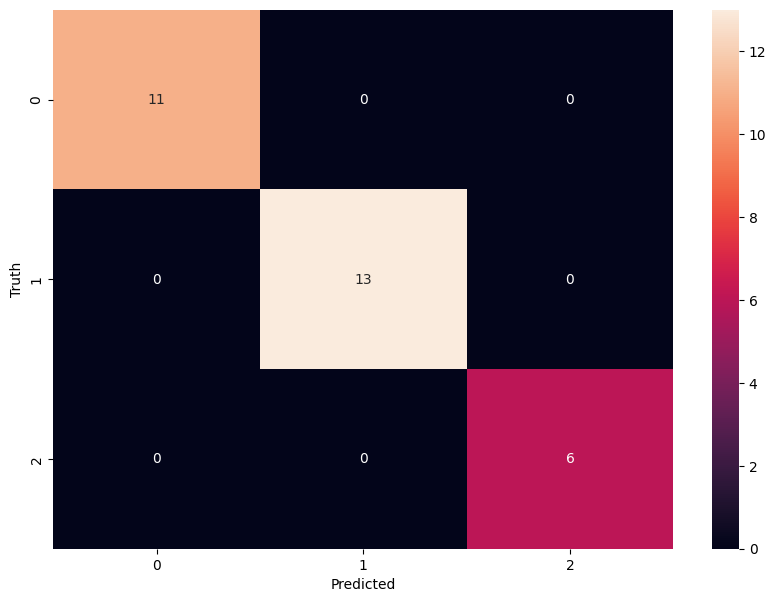

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,pred_df)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
accuracy_score(y_test,pred_df)

1.0

In [22]:
print(classification_report(y_test,pred_df))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Prediction in new input

In [23]:
sl=input("enter the sepal length:")
sw=input("enter the sepal width:")
pl=input("enter the petal length:")
pw=input("enter the petal width:")
label={0:'setosa',1:'versicolor',2:'virginica'}
prediction=df_rf.predict([[sl,sw,pl,pw]])
print(prediction)
print(label[prediction[0]])

enter the sepal length:5
enter the sepal width:3
enter the petal length:2
enter the petal width:1
[1]
versicolor


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
